## Load in packages and modified FROMAGe

In [1]:
%cd ../../..

/home/nils/NILS/Master/DL2/DL2-ZeroVis


In [2]:
from src.fromage_inf.inf_utils import PromptParser
import pickle
import itertools

In [3]:
parser = PromptParser("src/fromage_inf/fromage_model/")

# Load the relations dictionary to make the relations.
relations = pickle.load(open("src/code/relations_dict.pkl", "rb"))

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


# Zero-shot arithmetics

CEOs -> companies
Prompt:
Task description: Finish the analogy.
[CEOs/mark_zuckerberg] is to [companies/facebook], as [CEOs/bill_gates] is to 
Expected output: [companies/microsoft]
Model generated outputs:


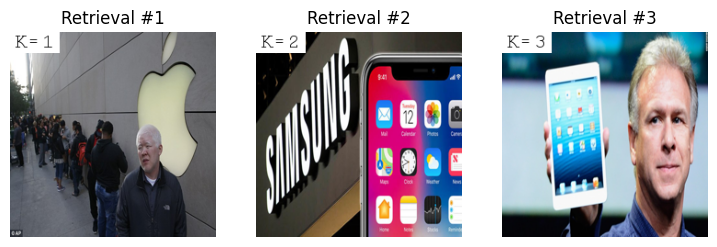

Prompt:
Task description: Finish the analogy.
[CEOs/bill_gates] is to [companies/microsoft], as [CEOs/mark_zuckerberg] is to 
Expected output: [companies/facebook]
Model generated outputs:


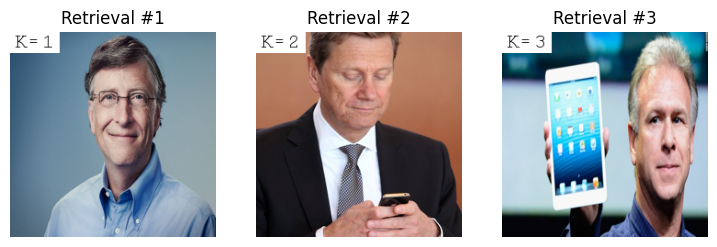

Prompt:
Task description: Finish the analogy.
[CEOs/mark_zuckerberg] is to [companies/facebook], as [CEOs/elon_musk] is to 
Expected output: [companies/tesla]
Model generated outputs:


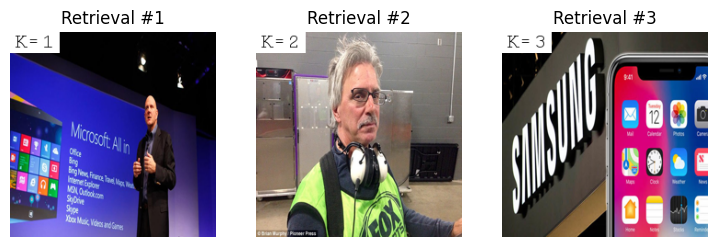

Prompt:
Task description: Finish the analogy.
[CEOs/elon_musk] is to [companies/tesla], as [CEOs/mark_zuckerberg] is to 
Expected output: [companies/facebook]
Model generated outputs:


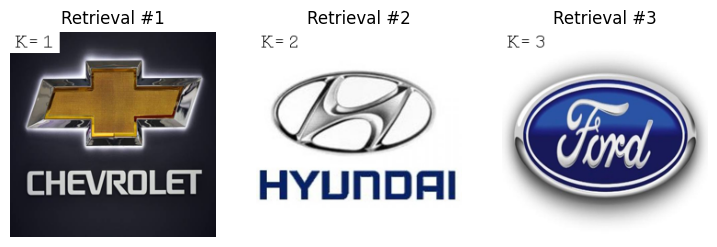

Prompt:
Task description: Finish the analogy.
[CEOs/mark_zuckerberg] is to [companies/facebook], as [CEOs/jeff_bezos] is to 
Expected output: [companies/amazon]
Model generated outputs:


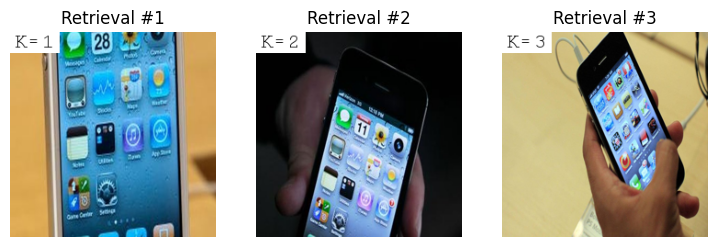

Prompt:
Task description: Finish the analogy.
[CEOs/jeff_bezos] is to [companies/amazon], as [CEOs/mark_zuckerberg] is to 
Expected output: [companies/facebook]
Model generated outputs:


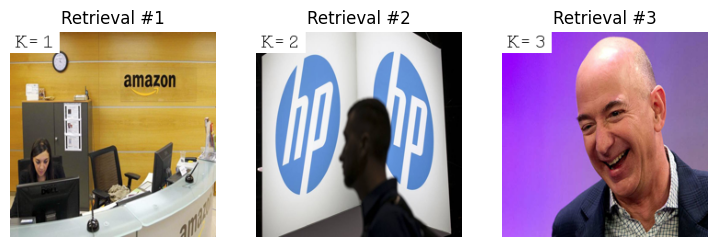

Prompt:
Task description: Finish the analogy.
[CEOs/mark_zuckerberg] is to [companies/facebook], as [CEOs/steve_jobs] is to 
Expected output: [companies/apple]
Model generated outputs:


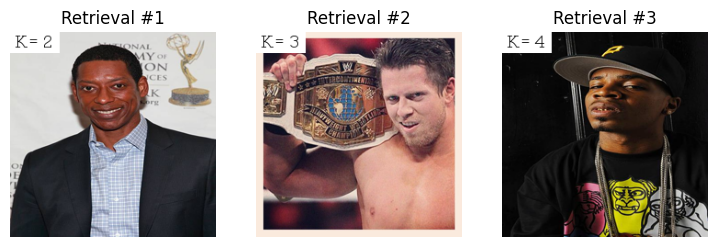

Prompt:
Task description: Finish the analogy.
[CEOs/steve_jobs] is to [companies/apple], as [CEOs/mark_zuckerberg] is to 
Expected output: [companies/facebook]


In [7]:
for relation, values in relations.items():
    print(relation)
    print('=' * 120)

    combinations = itertools.combinations(values, 2)

    for combo in combinations:
        tuple1, tuple2 = combo

        prompt = ["Task description: Finish the analogy.", 
            [tuple1[0]], " is to ", [tuple1[1]], ", as", [tuple2[0]], " is to "]
        
        print('='*60)
        print('Prompt:')
        print("Task description: Finish the analogy.")
        print("[{}] is to [{}], as [{}] is to ".format(tuple1[0], tuple1[1], tuple2[0]))
        print("Expected output: [{}]".format(tuple2[1]))

        print('=' * 30)
        model_outputs = parser.model.generate_for_images_and_texts(prompt, min_word_tokens=10, ret_scale_factor=1.3, num_words=32, temperature=0.8, top_p=0.5, max_img_per_ret=3)

        print('Model generated outputs:')
        parser.display(model_outputs)

        prompt = ["Task description: Finish the analogy.", 
            [tuple2[0]], " is to ", [tuple2[1]], ", as", [tuple1[0]], " is to "]

        print('='*45)
        print('Prompt:')
        print("Task description: Finish the analogy.")
        print("[{}] is to [{}], as [{}] is to ".format(tuple2[0], tuple2[1], tuple1[0]))
        print("Expected output: [{}]".format(tuple1[1]))

        print('=' * 30)
        model_outputs = parser.model.generate_for_images_and_texts(prompt, min_word_tokens=10, ret_scale_factor=1.3, num_words=32, temperature=0.8, top_p=0.5, max_img_per_ret=3)

        print('Model generated outputs:')
        parser.display(model_outputs)
